In [2]:
!ls

00_Data_Exploration_and_Preparation.ipynb  Online Retail.xlsx
01_Introduction_to_Cohort_Analysis.ipynb


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt

In [4]:
online = pd.read_excel('Online Retail.xlsx')

# 00. Exploring and cleaning the data

In this section we'll scan the dataset and do the following tasks:
 - Remove negative values for Quantity
 - Remove negative values for UnitPrice
 - Remove NULL values

In [5]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Removing negative values

Below we can see that both `Quantity` and `UnitPrice` varables have negative values.

We will remove them and further investigate the dataset.

In [6]:
online.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
online = online[online['Quantity'] > 0]
online = online[online['UnitPrice'] > 0]

In [8]:
online.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


### Identifying missing data

We can see below that `CustomerID` variable has a smaller number of non-null rows than other variables.

In [9]:
online.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      530104 non-null object
StockCode      530104 non-null object
Description    530104 non-null object
Quantity       530104 non-null int64
InvoiceDate    530104 non-null datetime64[ns]
UnitPrice      530104 non-null float64
CustomerID     397884 non-null float64
Country        530104 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.4+ MB


We can calculate how many variables are `NULL` and see that there are 132 220 entries with `NULL` values. We will just remove them in the next steps.

In [10]:
online.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

In [11]:
online = online[pd.notnull(online['CustomerID'])]

In [12]:
online.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# Exploring the dataset

In this section we will scan the dataset at a high level to understand it's structure, variable distributions and other information

### View number of Invoices per country

Let's review the distribution of sales count per country. United Kingdom is the largest, and the absolute majority of this dataset is from this country.

In [13]:
online.groupby(['Country'])['InvoiceNo'].agg('count').sort_values(ascending=False)

Country
United Kingdom          354321
Germany                   9040
France                    8341
EIRE                      7236
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1462
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45


### Most popular products

Let review the top 20 most popular products - there are 3 products that each account for more than 1 percent sales: Little Birdie paper craft, Medium ceramic top storage jar, and World War 2 gliders assorted designs.

In [14]:
online.groupby(['Description'])['Quantity'].agg('sum').sort_values(\
    ascending=False)[:20] / np.sum(online['Quantity']) * 100

Description
PAPER CRAFT , LITTLE BIRDIE           1.567298
MEDIUM CERAMIC TOP STORAGE JAR        1.507717
WORLD WAR 2 GLIDERS ASSTD DESIGNS     1.052960
JUMBO BAG RED RETROSPOT               0.893628
WHITE HANGING HEART T-LIGHT HOLDER    0.710649
ASSORTED COLOUR BIRD ORNAMENT         0.684274
PACK OF 72 RETROSPOT CAKE CASES       0.651978
POPCORN HOLDER                        0.598532
RABBIT NIGHT LIGHT                    0.526374
MINI PAINT SET VINTAGE                0.504585
PACK OF 12 LONDON TISSUES             0.490440
PACK OF 60 PINK PAISLEY CAKE CASES    0.469522
BROCADE RING PURSE                    0.444347
VICTORIAN GLASS HANGING T-LIGHT       0.434091
ASSORTED COLOURS SILK FAN             0.423313
RED  HARMONICA IN BOX                 0.405878
JUMBO BAG PINK POLKADOT               0.390204
SMALL POPCORN HOLDER                  0.353186
LUNCH BAG RED RETROSPOT               0.342447
60 TEATIME FAIRY CAKE CASES           0.342292
Name: Quantity, dtype: float64

### Least popular products

Let review the top 20 least popular products. It's interesting as the store has sold only one unit of each.

In [15]:
online.groupby(['Description'])['Quantity'].agg('sum').sort_values(ascending=False)[-20:]

Description
SET/3 FLORAL GARDEN TOOLS IN BAG       1
BAROQUE BUTTERFLY EARRINGS CRYSTAL     1
FIRE POLISHED GLASS NECKL GOLD         1
PURPLE CHUNKY GLASS+BEAD NECKLACE      1
PACK 4 FLOWER/BUTTERFLY PATCHES        1
POTTING SHED SOW 'N' GROW SET          1
DUSTY PINK CHRISTMAS TREE 30CM         1
EASTER CRAFT IVY WREATH WITH CHICK     1
FIRE POLISHED GLASS BRACELET BLACK     1
BLUE PADDED SOFT MOBILE                1
MUMMY MOUSE RED GINGHAM RIBBON         1
MARIE ANTOIENETT TRINKET BOX GOLD      1
CAKE STAND LACE WHITE                  1
HEN HOUSE W CHICK IN NEST              1
CHERRY BLOSSOM PURSE                   1
SET/3 TALL GLASS CANDLE HOLDER PINK    1
LASER CUT MULTI STRAND NECKLACE        1
CRACKED GLAZE EARRINGS BROWN           1
DOLPHIN WINDMILL                       1
SET OF 3 PINK FLYING DUCKS             1
Name: Quantity, dtype: int64

### Calculate how many items with 1 sale only

Only 59 products historical sales on 1 item, which is a low number and doesn't require further cleaning.

In [16]:
online.groupby(['Description']).filter(lambda x: x['Quantity'].sum() == 1)['Description'].agg('count')

59

# 01. Building time-based cohorts

In this section we are going to build time-based cohorts that will assign the acquisition month to each customer i.e. the month when each customer made their first paid transaction with this company.

We will then calculate several metrics such:
 - retention
 - average quantity
 - average price
 - average total basket sum

In [17]:
online['TotalSum'] = online['Quantity'] * online['UnitPrice']

In [18]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### Convert unique customer identifier into string

It will be easier to use for later aggregation

In [19]:
online['CustomerID'] = online['CustomerID'].astype(str)
len(set(online['CustomerID']))

4338

### Create an "InvoiceMonth" column
This column will be later used for defining the acquisition month for each customer

In [20]:
online['InvoiceMonth'] = online['InvoiceDate'].apply(lambda x: dt.datetime(x.year, x.month, 1))

### Assign acquisition month cohort per customer
We're going to use **transform** function on the dataframe to calculate the first month of each customer's purchase that will define their month of acquisition.

In [21]:
online['CohortMonth'] = online.groupby('CustomerID')['InvoiceMonth'].transform('min')

### Calculate cohort index - ***nth*** month offset
Cohort index will allow us to normalize the metrics and compare them for each monthly cohort. This way we can assess the performance of each monthly cohort for a given ***nth*** month after customer's acquisition.

What we do is take a difference between the dates, and add plus one, in order to have one based indexing which is easier to interpret in a business context.

In [22]:
online['CohortIndex'] = (
    online['InvoiceMonth'].apply(lambda x: x.year) - online['CohortMonth'].apply(lambda x: x.year))*12 + \
    (online['InvoiceMonth'].apply(lambda x: x.month) - online['CohortMonth'].apply(lambda x: x.month)) + 1

### Creating a string cohort month value
We will use this column to create a retention heatmap, and it will look much more beautiful in a short year-month format, than a full timestamp.

In [23]:
online['CohortMonth'] = online['CohortMonth'].apply(lambda x: x.strftime('%Y-%m'))

In [24]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12,1


### Create cohorts dataset with raw metrics
This is a fundamental step where metrics are defined. In this case we are creating three metrics: customer count, average price, and average quantity. We are going to use only the first one - customer count - to measure retention rate.

In [27]:
grouping = online.groupby(['CohortMonth', 'CohortIndex'])

cohort_data = grouping.agg({'CustomerID': pd.Series.nunique,
                           'UnitPrice': np.mean,
                           'Quantity': np.mean,
                           'TotalSum': np.mean})

cohort_data.rename(columns = {'CustomerID': 'CustomerCount',
                           'UnitPrice': 'AveragePrice',
                           'Quantity': 'AverageQuantity',
                           'TotalSum': 'AverageTotalSum'}, inplace = True)

### Create a pivot table with active purchasers from each cohort
We will create a pivot table with ***CohortMonth*** in rows, and ***CohortIndex*** in columns, with ***CustomerCount*** as the values. 

In [28]:
cohort_data.reset_index(level=['CohortMonth', 'CohortIndex'], inplace=True)
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerCount')

In [29]:
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Calculate retention rates
First, we're going to extract cohort size on the first month of their tenure with the company. Next, we will divide the number of active purchasers from each cohort by the size of that cohort. The result is a retention metric per each monthly cohort. 

In [30]:
cohort_sizes = cohort_counts[1].values
retention = cohort_counts.divide(cohort_sizes, axis=0)

In [31]:
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
2011-01,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
2011-02,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
2011-03,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
2011-04,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
2011-05,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Plot retention heatmap
We will use **Seaborn** library which we have imported earlier to build an easy-to-read heatmap chart.

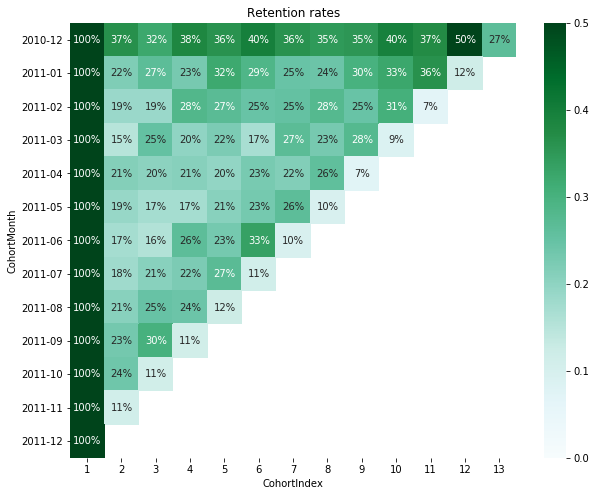

In [32]:
import seaborn as sns

plt.figure(figsize=(10, 8))
plt.title('Retention rates')
sns.heatmap(retention, annot=True, fmt='.0%', vmin=0.0, vmax=0.5, cmap='BuGn')
plt.show()